<a href="https://colab.research.google.com/github/admaesmo/ProyectoPrediccionSaberPro20242/blob/develop/02-exploracion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Entrega 1 Importando archivos train y test

In [2]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!pip install --upgrade kaggle

In [9]:
!kaggle competitions download -c udea-ai4eng-20242

 25% 5.00M/20.1M [00:00<00:00, 44.8MB/s]
100% 20.1M/20.1M [00:00<00:00, 116MB/s] 


In [11]:
!ls
!unzip udea-ai4eng-20242.zip


init.py  kaggle.json  local  __pycache__  sample_data  udea-ai4eng-20242.zip
Archive:  udea-ai4eng-20242.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [24]:
dtr = pd.read_csv("train.csv")
#dtr.shape, dts.shape
dtr.head()
print(dtr.describe())

                  ID        PERIODO
count  692500.000000  692500.000000
mean   494606.130576   20198.366679
std    285585.209455      10.535037
min         1.000000   20183.000000
25%    247324.750000   20195.000000
50%    494564.500000   20195.000000
75%    741782.500000   20203.000000
max    989286.000000   20213.000000


In [13]:
dtr = dtr[['FAMI_EDUCACIONMADRE', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'RENDIMIENTO_GLOBAL']]
dtr


,FAMI_EDUCACIONMADRE,ESTU_VALORMATRICULAUNIVERSIDAD,RENDIMIENTO_GLOBAL
0,Postgrado,Entre 5.5 millones y menos de 7 millones,medio-alto
1,Técnica o tecnológica incompleta,Entre 2.5 millones y menos de 4 millones,bajo
2,Secundaria (Bachillerato) completa,Entre 2.5 millones y menos de 4 millones,bajo
3,Secundaria (Bachillerato) completa,Entre 4 millones y menos de 5.5 millones,alto
4,Primaria completa,Entre 2.5 millones y menos de 4 millones,medio-bajo
...,...,...,...
692495,Secundaria (Bachillerato) incompleta,Entre 500 mil y menos de 1 millón,medio-alto
692496,Secundaria (Bachillerato) incompleta,Entre 2.5 millones y menos de 4 millones,bajo
692497,Secundaria (Bachillerato) incompleta,Entre 1 millón y menos de 2.5 millones,medio-bajo
692498,Primaria completa,Entre 2.5 millones y menos de 4 millones,bajo


In [25]:
dtr = dtr[['ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'RENDIMIENTO_GLOBAL']]
dtr.head()

,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,RENDIMIENTO_GLOBAL
0,Menos de 10 horas,Estrato 3,medio-alto
1,0,Estrato 3,bajo
2,Más de 30 horas,Estrato 3,bajo
3,0,Estrato 4,alto
4,Entre 21 y 30 horas,Estrato 3,medio-bajo


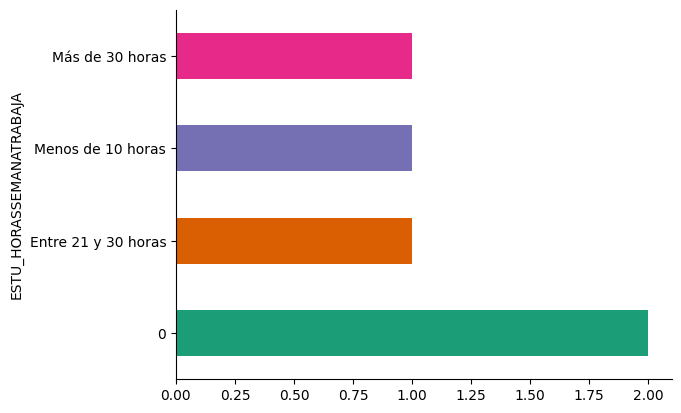

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('ESTU_HORASSEMANATRABAJA').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='ESTU_HORASSEMANATRABAJA'>

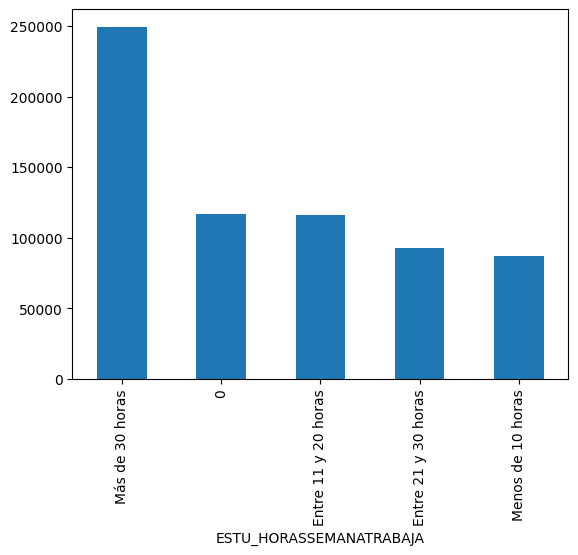

In [ ]:
dtr.ESTU_HORASSEMANATRABAJA.value_counts().plot(kind='bar')

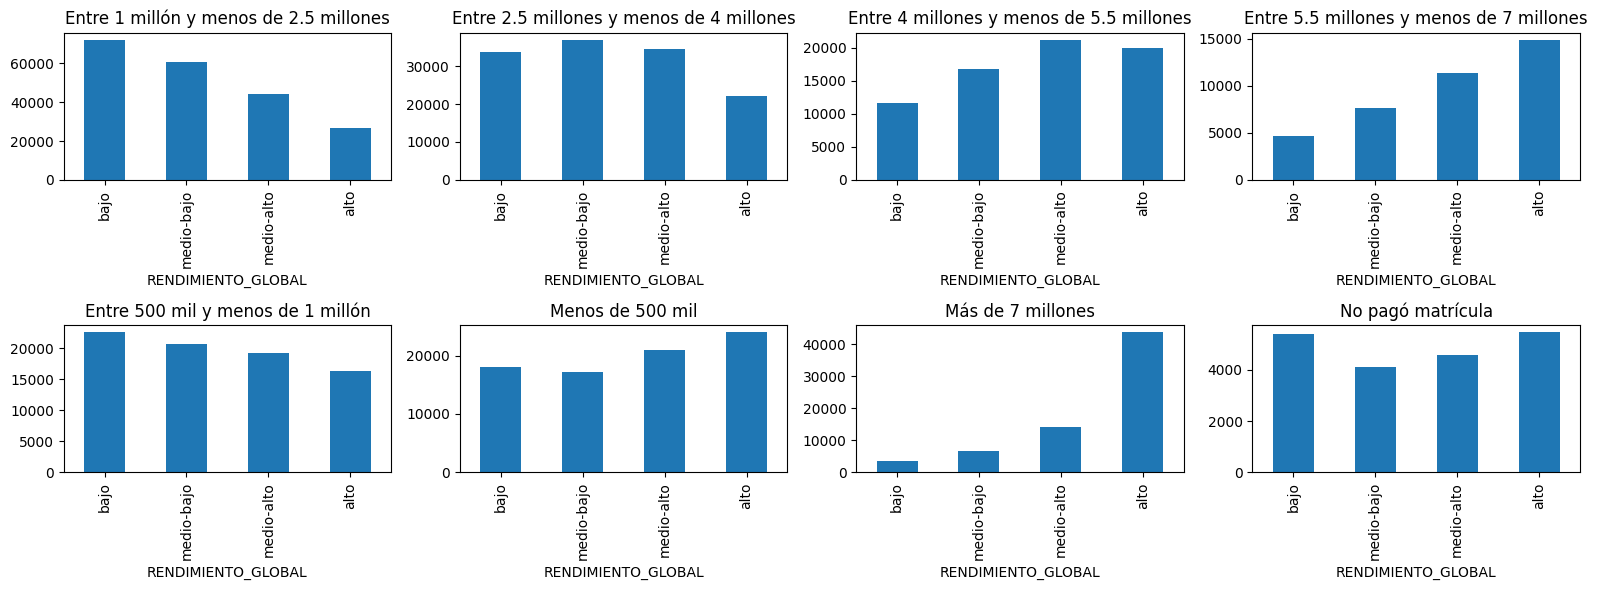

In [ ]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(dtr.ESTU_HORASSEMANATRABAJA.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    dtrCompara = dtr[dtr.ESTU_HORASSEMANATRABAJA==ci]
    dtrCompara.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

Comprendiendo el Dataset

Antes de crear el diagrama, es crucial entender qué nos dicen las variables:
  - Rendimiento_Global: Nuestra variable objetivo, es decir, lo que queremos explicar o predecir.
  - Variables socioeconómicas: Estrato socioeconómico, nivel educativo de los padres, tenencia de internet, etc. Estas variables nos darán indicios sobre el entorno en el que se desenvuelve el estudiante.
  - Variables académicas: Programa académico, departamento, horas trabajadas, etc. Estas variables nos informan sobre la carga académica y el compromiso del estudiante.

Selección de Variables para el Diagrama de Pareto

Para el diagrama de Pareto, buscamos identificar las categorías que más contribuyen a un determinado resultado. En este caso, nos interesa saber qué factores socioeconómicos o académicos más influyen en el rendimiento global bajo.

Variables prometedoras para el diagrama de Pareto:

   - Estrato socioeconómico: Es una variable clave que suele estar relacionada on el acceso a recursos y oportunidades educativas.
   Nivel educativo de los padres: El nivel educativo de los padres se asocia con las expectativas académicas y el apoyo que brindan a sus hijos.
   Horas trabajadas: El tiempo dedicado al trabajo puede influir en el tiempo disponible para el estudio.
   - Programa académico: Algunos programas pueden tener mayores demandas académicas que otros.

In [18]:
# Ejemplo agrupando por estrato socioeconómico y rendimiento
grouped = dtr.groupby(['FAMI_ESTRATOVIVIENDA', 'RENDIMIENTO_GLOBAL']).size().reset_index(name='count')

In [19]:
# Ordenar por la cantidad de estudiantes con bajo rendimiento
grouped = grouped.sort_values(['RENDIMIENTO_GLOBAL', 'count'], ascending=[True, False])

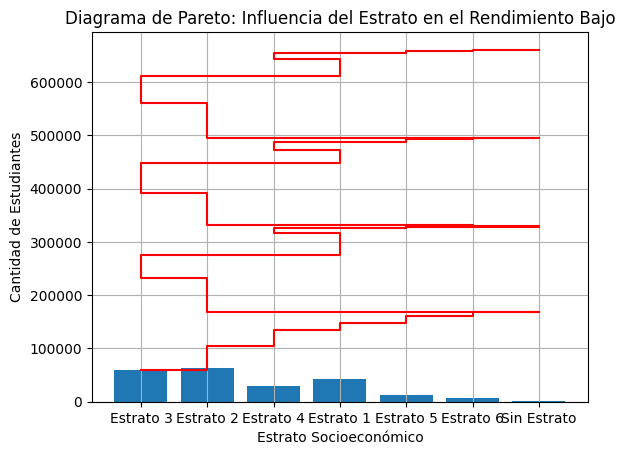

In [13]:
# Crear un gráfico de barras
plt.bar(grouped['FAMI_ESTRATOVIVIENDA'], grouped['count'])

# Agregar una línea que muestra la frecuencia acumulada
plt.plot(grouped['FAMI_ESTRATOVIVIENDA'], grouped['count'].cumsum(), color='red', drawstyle='steps-post')

# Personalizar el gráfico
plt.xlabel('Estrato Socioeconómico')
plt.ylabel('Cantidad de Estudiantes')
plt.title('Diagrama de Pareto: Influencia del Estrato en el Rendimiento Bajo')
plt.grid(True)

plt.show()

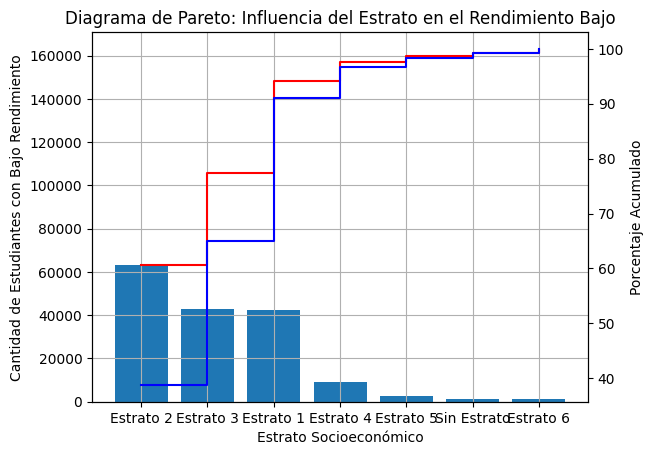

In [20]:
# Filtrar los datos para quedarnos solo con los estudiantes con bajo rendimiento
dtr_bajo_rendimiento = dtr[dtr['RENDIMIENTO_GLOBAL'] == 'bajo']

# Agrupar por estrato socioeconómico y contar
grouped = dtr_bajo_rendimiento.groupby('FAMI_ESTRATOVIVIENDA').size().reset_index(name='count')

# Ordenar de mayor a menor cantidad
grouped = grouped.sort_values('count', ascending=False)

# Crear el diagrama de Pareto
plt.bar(grouped['FAMI_ESTRATOVIVIENDA'], grouped['count'])

# Agregar la línea de frecuencia acumulada
plt.plot(grouped['FAMI_ESTRATOVIVIENDA'], grouped['count'].cumsum(), color='red', drawstyle='steps-post')

# Personalizar el gráfico
plt.xlabel('Estrato Socioeconómico')
plt.ylabel('Cantidad de Estudiantes con Bajo Rendimiento')
plt.title('Diagrama de Pareto: Influencia del Estrato en el Rendimiento Bajo')
plt.grid(True)

# Crear un eje secundario para los porcentajes
ax2 = plt.twinx()
ax2.plot(grouped['FAMI_ESTRATOVIVIENDA'], grouped['count'].cumsum() / grouped['count'].sum() * 100, color='blue', drawstyle='steps-post')
ax2.set_ylabel('Porcentaje Acumulado')

plt.show()



## repetimos el analsis en caso de rendimiento alto

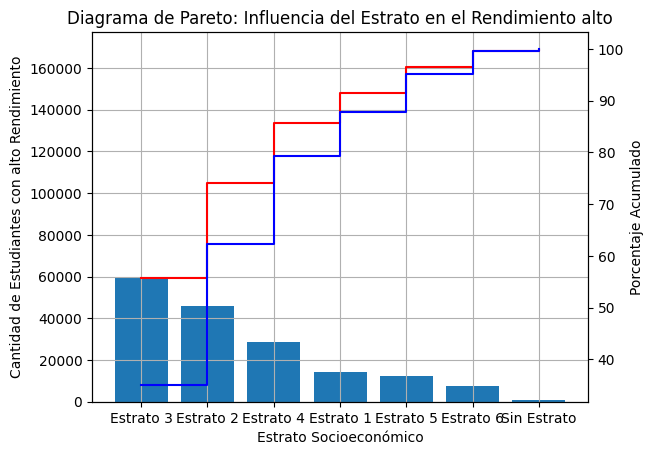

In [22]:
# Filtrar los datos para quedarnos solo con los estudiantes con alto rendimiento
dtr_alto_rendimiento = dtr[dtr['RENDIMIENTO_GLOBAL'] == 'alto']

# Agrupar por estrato socioeconómico y contar
grouped = dtr_alto_rendimiento.groupby('FAMI_ESTRATOVIVIENDA').size().reset_index(name='count')

# Ordenar de mayor a menor cantidad
grouped = grouped.sort_values('count', ascending=False)

# Crear el diagrama de Pareto
plt.bar(grouped['FAMI_ESTRATOVIVIENDA'], grouped['count'])

# Agregar la línea de frecuencia acumulada
plt.plot(grouped['FAMI_ESTRATOVIVIENDA'], grouped['count'].cumsum(), color='red', drawstyle='steps-post')

# Personalizar el gráfico
plt.xlabel('Estrato Socioeconómico')
plt.ylabel('Cantidad de Estudiantes con alto Rendimiento')
plt.title('Diagrama de Pareto: Influencia del Estrato en el Rendimiento alto')
plt.grid(True)

# Crear un eje secundario para los porcentajes
ax2 = plt.twinx()
ax2.plot(grouped['FAMI_ESTRATOVIVIENDA'], grouped['count'].cumsum() / grouped['count'].sum() * 100, color='blue', drawstyle='steps-post')
ax2.set_ylabel('Porcentaje Acumulado')

plt.show()
